In [14]:
# L train
# average AM enters / exits

In [1]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [2]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [3]:
# look at L line only
L_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('L')]

In [4]:
# look at all station names
L_train_all['STATION'].unique()

array(['1 AV', '14 ST', '14 ST-UNION SQ', '3 AV', '6 AV', '8 AV',
       'ATLANTIC AV', 'BEDFORD AV', 'BROADWAY JCT', 'BUSHWICK AV',
       'CANARSIE-ROCKAW', 'DEKALB AV', 'EAST 105 ST', 'GRAHAM AV',
       'GRAND ST', 'HALSEY ST', 'JEFFERSON ST', 'LIVONIA AV',
       'LORIMER ST', 'METROPOLITAN AV', 'MONTROSE AV', 'MORGAN AV',
       'MYRTLE-WYCKOFF', 'NEW LOTS', 'SUTTER AV', 'WILSON AV'],
      dtype=object)

In [5]:
# check station count
L_train_all['STATION'].count()

29

In [7]:
# needs further cleaning
L_train_all["STATION"].replace("METROPOLITAN AV", value="LORIMER ST", inplace=True)
L_train_all["STATION"].replace("14 ST", value="6 AV", inplace=True)

In [9]:
# now sum same name rows
L_commuters = L_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
L_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
1 AV,2173.0,5427.0
14 ST-UNION SQ,17962.0,48134.0
3 AV,332.0,1632.0
6 AV,10078.0,19968.0
8 AV,4572.0,6636.0


In [10]:
# order stations in excel
# save as csv
L_commuters.to_csv('L_commuters.csv')

In [12]:
# open ordered CSV
csv_path_L = 'L_commuters_order.csv'
L_commuters_order = pd.read_csv(csv_path_L, encoding="utf-8")
L_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,8 AV,4572,6636
1,6 AV,10078,19968
2,14 ST-UNION SQ,17962,48134
3,3 AV,332,1632
4,1 AV,2173,5427


In [13]:
L_commuters_order['AM_AVG_ENTER'] = L_commuters_order['AM_ENTERS']/5

In [14]:
L_commuters_order['AM_AVG_EXIT'] = L_commuters_order['AM_EXITS']/5
L_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,8 AV,4572,6636,914.4,1327.2
1,6 AV,10078,19968,2015.6,3993.6
2,14 ST-UNION SQ,17962,48134,3592.4,9626.8
3,3 AV,332,1632,66.4,326.4
4,1 AV,2173,5427,434.6,1085.4


In [15]:
# order stations in excel
# save as csv
L_commuters_order.to_csv('L_commuters_final.csv')

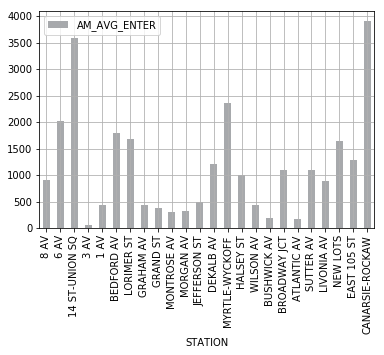

In [16]:
# graph L Train AM AVG ENTERS
plt = L_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#A7A9AC')
plt.grid()

# save the fig
plt.figure.savefig('L-AM-enter.pdf')

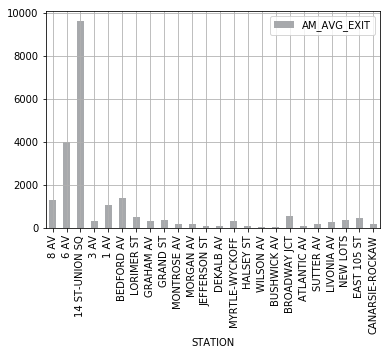

In [17]:
# graph L Train AM AVG EXITS
plt = L_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#A7A9AC')
plt.grid()

# save the fig
plt.figure.savefig('L-AM-exit.pdf')